1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FixedLocator, MultipleLocator
from scipy import optimize
from scipy.signal import argrelextrema
%matplotlib inline

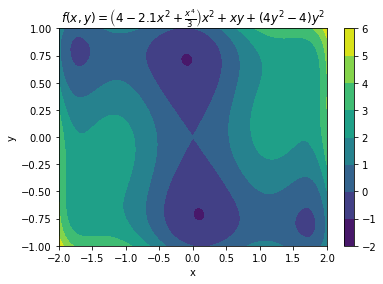

In [2]:
# question 1 first part
def f(x):                     
  return (4-2.1*x[0]**2+(1/3)*x[0]**4)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$')
plt.show()

FIRST GLOBAL MINIMUM COORDINATES:
The first minimum is at position (0.0898,-0.7127), where the function gets value -1.0316

SECOND GLOBAL MINIMUM:
The second minimum is at position (-0.0898,0.7127), where the function gets value -1.0316


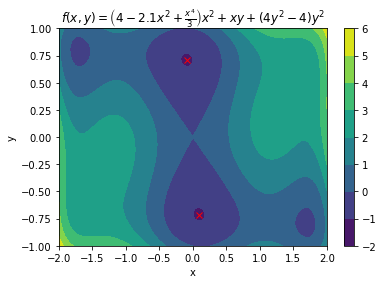

In [3]:
#Question 1 second part
print("FIRST GLOBAL MINIMUM COORDINATES:")
x01 = [0, -0.5]                     
x_min_1 = optimize.minimize(f, x01, method='BFGS')
print("The first minimum is at position ({:.4f},{:.4f}), where the function gets value {:.4f}"
    .format(x_min_1.x[0], x_min_1.x[1], x_min_1.fun))
print("\nSECOND GLOBAL MINIMUM:")
x02 = [0, 0.5]                     
x_min_2 = optimize.minimize(f, x02, method='BFGS')
print("The second minimum is at position ({:.4f},{:.4f}), where the function gets value {:.4f}"
    .format(x_min_2.x[0], x_min_2.x[1], x_min_2.fun))
plt.contourf(X, Y, Z)
plt.plot(x_min_1.x[0], x_min_1.x[1], 'xr')
plt.plot(x_min_2.x[0], x_min_2.x[1], 'xr')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$')
plt.show()

In [4]:
#Question 1 third part
#for an initial guess of (𝑥,𝑦)=(0,0) 
x0 = [0, 0]
x_min = optimize.minimize(f, x0)
print("The minimum is found at position ({:.2f},{:.2f}), where the function gets value {:.2f}"
    .format(x_min.x[0], x_min.x[1], x_min.fun))
print("We may say that the minimization stucks in a local minima if we choose (0, 0) as starting point")

The minimum is found at position (0.00,0.00), where the function gets value 0.00
We may say that the minimization stucks in a local minima if we choose (0, 0) as starting point


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

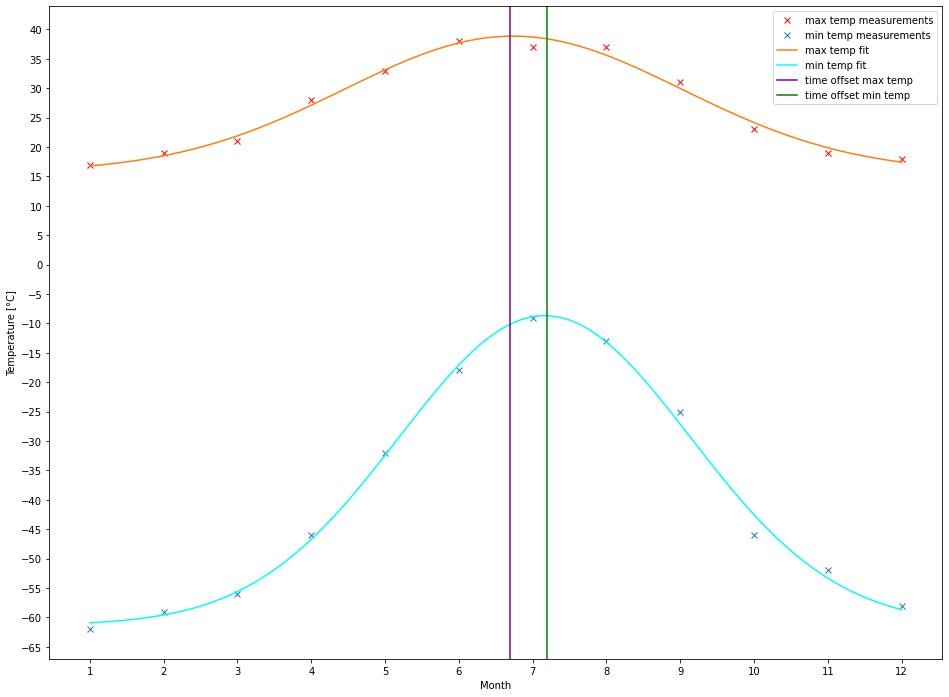

In [5]:
# Question 2 Solution
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1, 13)
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(months, temp_max, 'x', color='red', label='max temp measurements')
ax.plot(months, temp_min, 'x', label='min temp measurements')
ax.xaxis.set_major_locator(FixedLocator(range(13)))
ax.yaxis.set_major_locator(MultipleLocator(5))
def gauss_function(x, a, mu, sigma, c):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + c
popt_max, pcov = optimize.curve_fit(gauss_function, months, temp_max)
popt_min, pcov = optimize.curve_fit(gauss_function, months, temp_min)
months_high_res = np.arange(1, 12.1, 0.1)
temp_max_fit = gauss_function(months_high_res, popt_max[0], popt_max[1], popt_max[2], popt_max[3])
temp_min_fit = gauss_function(months_high_res, popt_min[0], popt_min[1], popt_min[2], popt_min[3])
ax.plot(months_high_res, temp_max_fit, label='max temp fit')
ax.plot(months_high_res, temp_min_fit, color='aqua', label='min temp fit')
ax.axvline(months_high_res[np.argmax(temp_max_fit)], color='purple', label='time offset max temp')
ax.axvline(months_high_res[np.argmax(temp_min_fit)], color='green', label='time offset min temp')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature [°C]')
ax.legend()

In [7]:
print("Max temperature time offset -> {:.3f}".format(months_high_res[np.argmax(temp_max_fit)]))
print("Min temperature time offset -> {:.3f}".format(months_high_res[np.argmax(temp_min_fit)]))

Max temperature time offset -> 6.700
Min temperature time offset -> 7.200


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Text(0, 0.5, 'Counts')

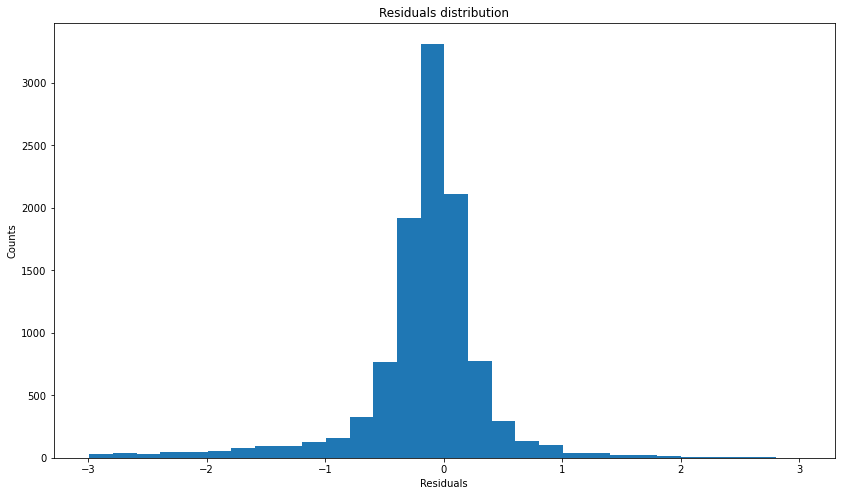

In [8]:
#Question 3 First part
path = "data/residuals_261.pkl"
pickle_data = np.array(np.load(path, allow_pickle=True), ndmin=1)
data = pickle_data[0]
df = pd.DataFrame(data=data, columns=['residuals', 'distances'])
df = df[(abs(df['residuals']) < 3)] # filter the outliers
df_res = pd.DataFrame(df['residuals'])
fig, ax = plt.subplots(figsize=(14, 8))
h, bins, _ = ax.hist(df_res, bins=30)
ax.set_title('Residuals distribution')
ax.set_xlabel('Residuals')
ax.set_ylabel('Counts')

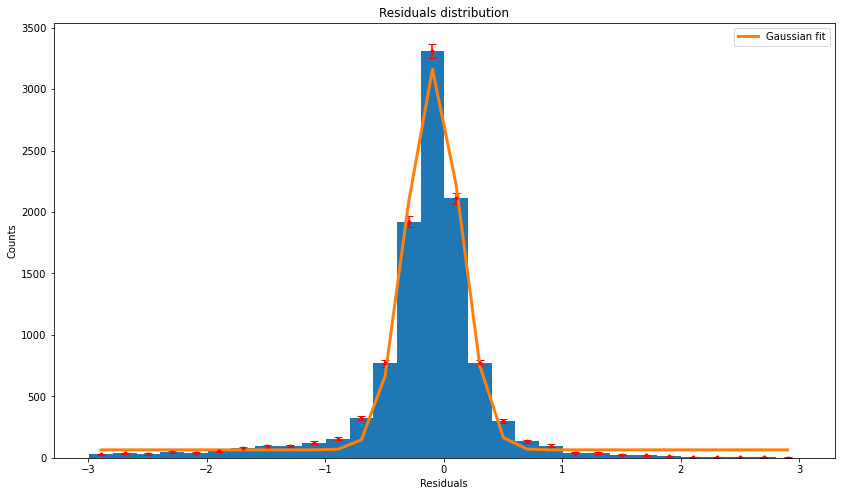

In [10]:
#Question 3 Second part
centers = (bins[1:]+bins[:-1])/2
def gauss_function(x, a, mu, sigma, c):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + c
popt, pcov = optimize.curve_fit(gauss_function, centers, h)
err_h = np.sqrt(h)
fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(df_res, bins=30)
ax.errorbar(centers, h, yerr=err_h, color='r', fmt='.', capsize=4)
ax.plot(centers, gauss_function(centers, popt[0], popt[1], popt[2], popt[3]), linewidth=3, label='Gaussian fit')
ax.set_title('Residuals distribution')
ax.set_xlabel('Residuals')
ax.set_ylabel('Counts')
ax.legend()

In [11]:
#Question 3 third part
import scipy
ndof = len(centers) - 1
print("n degrees of freedom =", ndof)
err_h[err_h == 0] = 1
chi2 = np.sum((h - gauss_function(centers, popt[0], popt[1], popt[2], popt[3]))**2 / err_h)
print("chi2 =", chi2)
pvalue = 1. - scipy.stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) 
print("\nSince p-value < 0.05, the fit should be considered as not satisfactory")

n degrees of freedom = 29
chi2 = 17607.062738349377
p-value = 0.0

Since p-value < 0.05, the fit should be considered as not satisfactory


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Optimal Parameters:  [-9.96203468 12.33174286  9.26282131]

Cov matrix:
 [[ 1.75558202e-02  9.86007561e-07 -2.76510980e-06]
 [ 9.86007561e-07  1.77329886e-04  5.40549118e-08]
 [-2.76510980e-06  5.40549118e-08  8.78853325e-03]]

The overall avg. temperature is:  9.262821311776861

Daily average values of coldest/hottest time of year are:  -0.6992133648773713  /  19.224855988431095


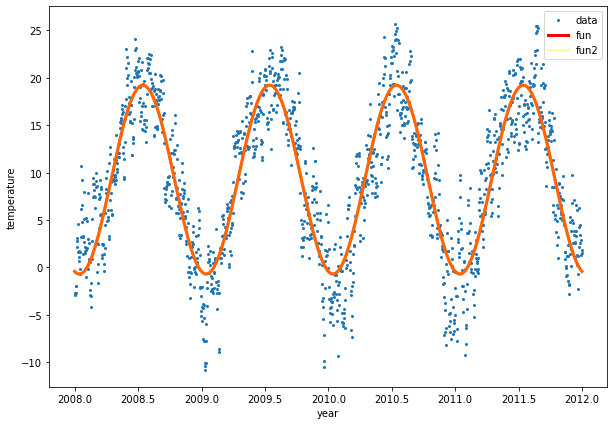

SSR1:  18662.47749843407  SSR2:  18663.716852820216
CL: 1.000 , additional parameter necessary: NO


In [15]:
#Question 4 Solution
from scipy.stats import f
df = pd.read_csv("munich_temperatures_average_with_bad_data.txt", sep = ' ', names = ['date','temperature'])
df = df[(df['temperature'] < 80) & (df['date'] < 2012) & (df['date'] >= 2008)]
date = df["date"]
temperature = df["temperature"]
def fun(t, A, b, c):
    return A * np.cos(2 * np.pi * t + b) + c
popt, pcov = optimize.curve_fit(fun, date, temperature)
fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel("temperature")
plt.xlabel("year")
plt.plot(date, temperature, marker="o", markersize = 2, label = "data", linestyle = "None")
x_lin = np.linspace(2008, 2012, len(temperature))
y = fun(x_lin, *popt)
plt.plot(x_lin, y, color='red', linewidth = 3, label = "fun")
print("Optimal Parameters: ", popt)
print("\nCov matrix:\n", pcov)
print("\nThe overall avg. temperature is: ", popt[2])
print("\nDaily average values of coldest/hottest time of year are: ", (popt[2] + popt[0]), " / ", (popt[2] - popt[0]))
def fun2(t, A, b, c, d):
    return A * np.cos(2 * np.pi * t * b + c) + d
popt2, pcov2 = optimize.curve_fit(fun2, date, temperature)
y2 = fun2(x_lin, *popt2)
plt.plot(x_lin, y2, color='yellow', linewidth = 3, label = "fun2", alpha = 0.4)
plt.legend()
plt.show()
ssr_1 = np.sum((y - temperature)**2)
ssr_2 = np.sum((y2 - temperature)**2)
print("SSR1: ", ssr_1, " SSR2: ", ssr_2)
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
cl_1_2 = Ftest(ssr_1, ssr_2, 2, 3, len(temperature), verbose=True)